Name: Veid Krishna Mishra

LGMVIP DATA SCIENCE INTERN 

TASK #4 INTERMEDIATE

OBJECTIVE: TO FIND OUT THE HOT ZONES OF TERRORISM


**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot 
import math
import os
import plotly.offline as py

**READ THE DATASET**

In [ ]:
terrorism_data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")
df=pd.DataFrame(terrorism_data)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**PREVIEWING THE DATASET**

In [ ]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Since there are 135 columns in the dataset, we only need some of them in our analysis therefore forming a dataframe of just those columns. 
for i in df.columns:
  print(i,end=" , ")

eventid , iyear , imonth , iday , approxdate , extended , resolution , country , country_txt , region , region_txt , provstate , city , latitude , longitude , specificity , vicinity , location , summary , crit1 , crit2 , crit3 , doubtterr , alternative , alternative_txt , multiple , success , suicide , attacktype1 , attacktype1_txt , attacktype2 , attacktype2_txt , attacktype3 , attacktype3_txt , targtype1 , targtype1_txt , targsubtype1 , targsubtype1_txt , corp1 , target1 , natlty1 , natlty1_txt , targtype2 , targtype2_txt , targsubtype2 , targsubtype2_txt , corp2 , target2 , natlty2 , natlty2_txt , targtype3 , targtype3_txt , targsubtype3 , targsubtype3_txt , corp3 , target3 , natlty3 , natlty3_txt , gname , gsubname , gname2 , gsubname2 , gname3 , gsubname3 , motive , guncertain1 , guncertain2 , guncertain3 , individual , nperps , nperpcap , claimed , claimmode , claimmode_txt , claim2 , claimmode2 , claimmode2_txt , claim3 , claimmode3 , claimmode3_txt , compclaim , weaptype1 , wea

**FILTERING THE DATASET FOR SPECIFIC COLUMNS**

In [ ]:
df1=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df1.head()       

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


**RENAMING SOME COLUMNS FOR EASE OF ACCESS AND READABILTY**

In [ ]:
df2=df1.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=False)

In [ ]:
df2.info()
print("NUMBER OF ROWS AND COLUMNS IN FILTERED DATASET IS")
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

(181691, 19)

In [ ]:
df2.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City',
       'Latitude', 'Longitude', 'Location', 'Summary', 'Attack Type',
       'Target Type', 'Group Name', 'Motive', 'Weapon Type', 'Killed',
       'Wounded', 'Add Notes'],
      dtype='object')

In [ ]:
#shows number of null values for each column
df2.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [ ]:
#FILLING null entries in wounded and killed column as 0
df2["Killed"]=df2["Killed"].fillna(0)
df2["Wounded"]=df2["Wounded"].fillna(0)
df2.head()


,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN


**ANALYSIS PART CODE:**



In [ ]:
df2.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


***INSIGHTS:***

1. MAXIMUM KILLED IN AN TERRORIST ATTACK IS 1570.
2. MAXIMUM WOUNDED IN AN TERRORIST ATTACK IS 8191.
3. THE DATASET CONTAINS THE TERRORIST ATTACK RELATED DATA FROM 1970 TO 2017.


In [ ]:
#some more basic insights
print("CITY WITH MOST ATTACKS : " , df2["City"].value_counts().index[1]) #first entry is unknown so second highest
print("COUNTRY WITH MOST ATTACKS : " , df2["Country"].value_counts().idxmax())
print("GROUP WITH MOST ATTACKS : " , df2["Group Name"].value_counts().index[1])# second most attacking group
print("COUNTRY WITH MOST ATTACKS : " , df2["Country"].value_counts().idxmax())
print("COUNTRY WITH MOST ATTACKS : " , df2["Country"].value_counts().idxmax())
print("MOST ATTACK TYPES  : " , df2["Attack Type"].value_counts().idxmax())
print("YEAR WITH MOST ATTACKS : " , df2["Year"].value_counts().idxmax()) #first entry is unknown so second highest

CITY WITH MOST ATTACKS :  Baghdad
COUNTRY WITH MOST ATTACKS :  Iraq
GROUP WITH MOST ATTACKS :  Taliban
COUNTRY WITH MOST ATTACKS :  Iraq
COUNTRY WITH MOST ATTACKS :  Iraq
MOST ATTACK TYPES  :  Bombing/Explosion
YEAR WITH MOST ATTACKS :  2014


***REGION BASED ATTACKS NUMBER PER YEAR***

In [ ]:
region=pd.crosstab(df2.Year,df2.Region)
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


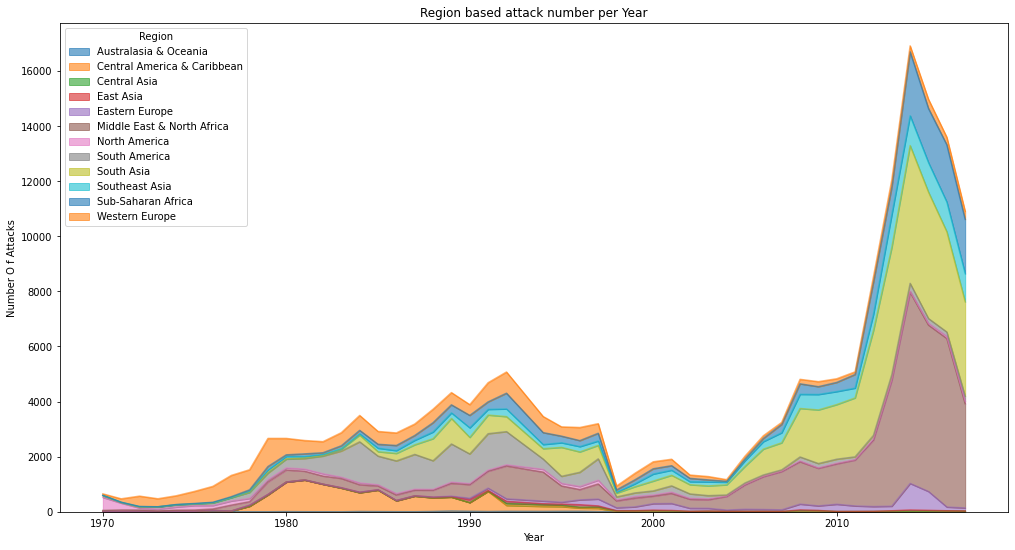

In [ ]:
#PLOTTING AREA PLOT FOR REGIONS FOR EACH YEAR AGAINST NUMBER OF ATTACKS

region.plot(kind="area",alpha=0.6,figsize=(17,9))
plot.title("Region based attack number per Year")
plot.ylabel("Number O f Attacks")
plot.show()

**FROM THE ABOVE AREA PLOT, MIDDLE EAST AND NORTH AFRICA - REGION    HAS  THE MOST ATTACKED CHANCES. **                                                                   

***NUMBER OF ATTACKS IN EACH YEAR FROM 1970 TO 2017***

In [ ]:

year_wise=df2["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"})

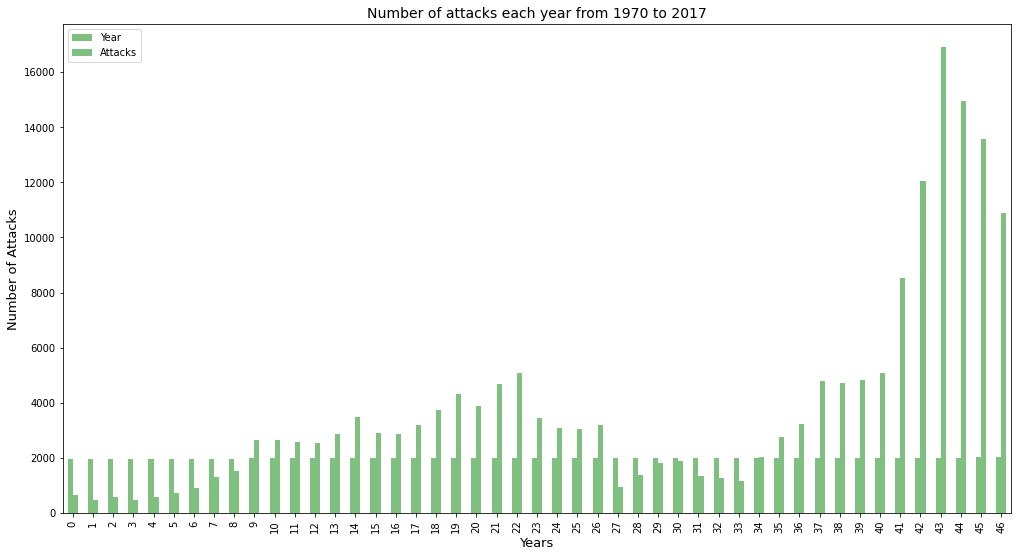

In [ ]:
#plotting a bar chart for above table
year_wise.plot(kind="bar", alpha=0.5, figsize=(17,9), color="green")
plot.title("Number of attacks each year from 1970 to 2017",fontsize=14)
plot.xlabel("Years",fontsize=13)
plot.ylabel("Number of Attacks",fontsize=13);
plot.show()

***TOTAL NUMBER OF ATTACKS IN EACH REGION***

In [ ]:
region1=region.transpose()
region1

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,1,1,8,1,1,0,0,0,2,2,...,8,1,1,0,0,1,9,14,10,12
Central America & Caribbean,7,5,3,6,11,9,45,24,199,609,...,0,9,1,1,1,14,5,1,3,4
Central Asia,0,0,0,0,0,0,0,0,0,0,...,36,31,9,9,12,7,9,10,17,7
East Asia,2,1,0,2,4,12,2,4,35,16,...,25,8,1,4,4,15,43,28,8,7
Eastern Europe,12,5,1,1,2,0,0,2,2,1,...,209,165,261,198,173,165,962,684,134,110
Middle East & North Africa,28,55,53,19,42,44,55,211,128,455,...,1536,1361,1463,1663,2409,4560,6939,6036,6115,3780
North America,472,247,73,64,111,159,125,149,117,79,...,31,16,24,12,39,32,37,62,75,97
South America,65,24,33,83,81,55,91,119,222,236,...,144,159,148,106,133,182,283,176,159,172
South Asia,1,0,1,1,2,4,4,2,2,34,...,1759,1945,1981,2138,3803,4612,4998,4585,3639,3430


In [ ]:

region1["TOTAL"]=region1.sum(axis=1)
region2=region1["TOTAL"].sort_values(ascending=False)
region2


Region
Middle East & North Africa     100948
South Asia                      89948
South America                   37956
Sub-Saharan Africa              35100
Western Europe                  33278
Southeast Asia                  24970
Central America & Caribbean     20688
Eastern Europe                  10288
North America                    6912
East Asia                        1604
Central Asia                     1126
Australasia & Oceania             564
Name: TOTAL, dtype: int64

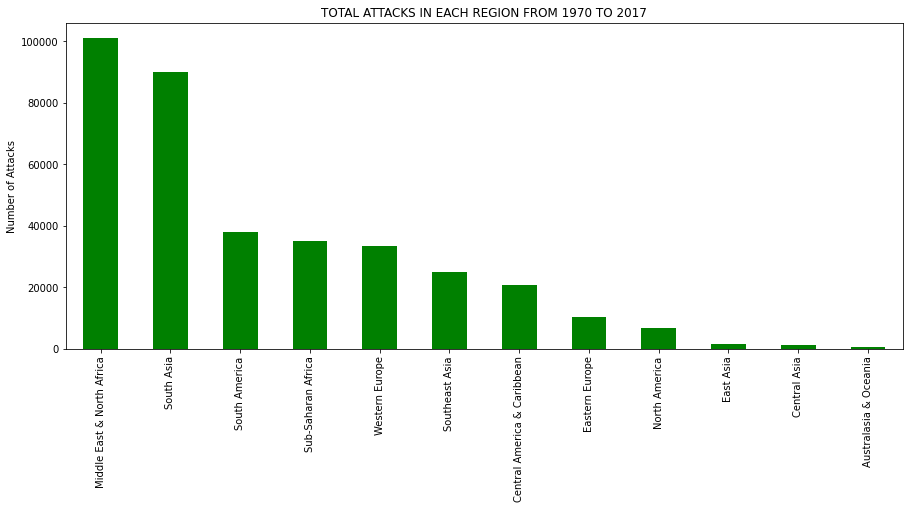

In [ ]:
#plotting a bar chart for above table
region2.plot(kind="bar",figsize=(15,6),color="green")
plot.title("TOTAL ATTACKS IN EACH REGION FROM 1970 TO 2017")
plot.xlabel("")
plot.ylabel("Number of Attacks")
plot.show()

***NUMBER OF ATTACKS IN EACH COUNTRY***

In [ ]:
country=df2["Country"].value_counts().head(20)
country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

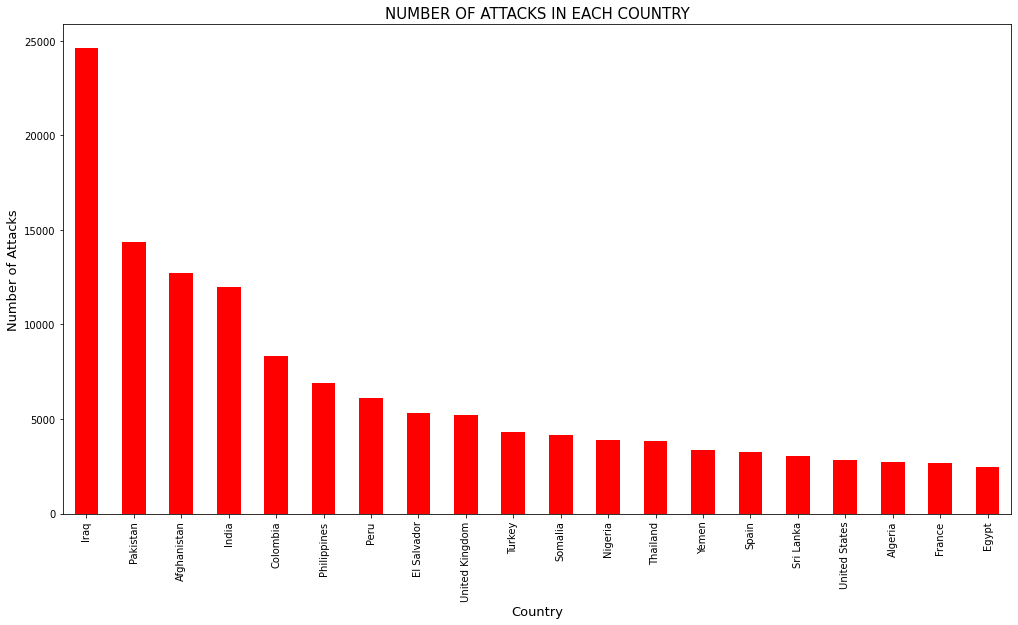

In [ ]:
#Country wise attacks plotting a bar chart
country.plot(kind="bar",figsize=(17,9), color="red")
plot.title("NUMBER OF ATTACKS IN EACH COUNTRY",fontsize=15)
plot.xlabel("Country",fontsize=13)
plot.ylabel("Number of Attacks",fontsize=13)
plot.show()

*IRAQ IS MOST PRONE TO TERRORIST ACTIVITIES AS MOST NUMBER OF ATTACKS TILL 2017 HAS HAPPENED THERE , FOLLOWED BY PAKISTAN AND THEN AFGHANISTAN.*

***CASUALTIES IN EACH YEAR FOR EACH COUNTRY***

In [ ]:
df2["Casualties"]=df2["Wounded"] + df2["Killed"]
df2.sort_values(by="Casualties",ascending=False)[ : 30]
heatt=df2.pivot_table(index="Country",columns="Year",values="Casualties")
heatt.fillna(0,inplace=True)
heatt.head()


Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,...,5.852657,5.306163,5.273063,8.232779,5.569775,5.565489,5.770285,6.848029,7.808905,8.570721
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,5.392523,3.842593,3.290000,3.933333,3.292683,6.772727,5.153846,2.500000,1.222222,2.214286
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.333333,...,0.000000,2.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.666667


## ***Terrorist acts in the Middle East and northern Africa countries like Iraq have been seen to have lethal repurcussions. The Middle East and North Africa are seen to be the places of the most serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the ones most damaged by these terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.***